In [1]:
import torch
# torch.rand(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
# Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)

# torch.normal(means, std, out=None) 

num_inputs = 2
num_example = 1000

true_w = [2,-3.4]
true_b = 4.2

features = torch.randn(num_example, num_inputs)

labels = true_w[0] * features[:,0] + true_w[1] * features[:,1]
labels = labels + torch.randn(labels.shape) * 0.01




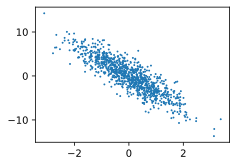

In [3]:
from IPython import display
from matplotlib import pyplot as plt

def use_svg_display():
    # IPython.display.set_matplotlib_formats(*formats, **kwargs)
    # Select figure formats for the inline backend. 
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize = (3.5,2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()

plt.scatter(features[:,1].numpy(),labels.numpy(),1);
    

In [4]:
import random
def data_iter(batch_size, features, labels):
    
    num_examples = len(features)
    # python range() 函数可创建一个整数列表,range(start, stop[, step])
    # start: 计数从 start 开始。默认是从 0 开始。例如range（5）等价于range（0， 5）;
    # stop: 计数到 stop 结束，但不包括 stop。例如：range（0， 5） 是[0, 1, 2, 3, 4]没有5
    # step：步长，默认为1。例如：range（0， 5） 等价于 range(0, 5, 1)

    
    # range()函数得到的其实是一个iterable类型，在python里解释为可以迭代的对象，所以可以使用for来遍历产生的结果，
    # 使用list()将结果转化为列表类型。
    indices = list(range(0, num_examples))
    
    random.shuffle(indices)
    
    for i in range(0, num_example, batch_size):
        j = indices[i:min(num_example, i + batch_size)]
        
    
        yield features[j],labels[j]
    

In [8]:
# 其中，X的shape是（n,2）,y的shape是（n,）

for X,y in data_iter(10, features, labels):
    print(X,y)
    break

tensor([[-1.0947,  0.6321],
        [ 1.1529, -0.0970],
        [ 0.9022, -0.1572],
        [-0.2414, -0.6571],
        [-1.4833,  0.6114],
        [-0.7695,  0.0896],
        [-1.3104, -1.2283],
        [ 0.6745, -0.8303],
        [-0.3632,  1.6950],
        [-1.0601,  0.9524]]) tensor([-4.3515,  2.6241,  2.3345,  1.7582, -5.0410, -1.8575,  1.5706,  4.1821,
        -6.4925, -5.3642])


In [9]:
# 初始化参数,其中，w的shape是（2，1）,b的shape是(1,1)
w = torch.randn((num_inputs,1))
b = torch.randn((1,1))


In [ ]:
#返回的是(n,1)
def linreg(X,w,b):
    return torch.dot(X,w) + b



def squared_loss(y_hat,y):
    return (y_hat- y.reshape(y_hat)).pow(2) / 2

def svg(params,lr,batch_size):
    for param in params:
        param[:] = param - lr * param.
